Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm 

In [2]:
data=pd.read_csv(r"C:\Users\One\Desktop\Excelr\Assignments\4/Salary_Data.csv") #Reading the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info() #Information Regarding data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.describe() #Statistical info about the data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


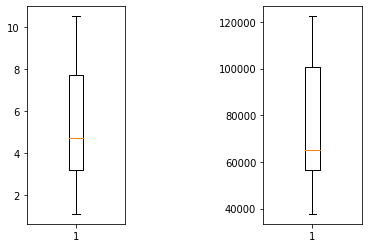

In [5]:
plt.subplot(1,3,1) # for checking the outliers in delivery time
plt.boxplot(data.YearsExperience)
plt.subplot(1,3,3)
plt.boxplot(data.Salary)
plt.show()

In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


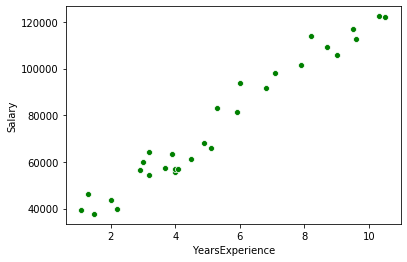

In [7]:
sns.scatterplot(data.YearsExperience,data.Salary,color='g')# ploting the linear relationship between the two variables 
plt.show()

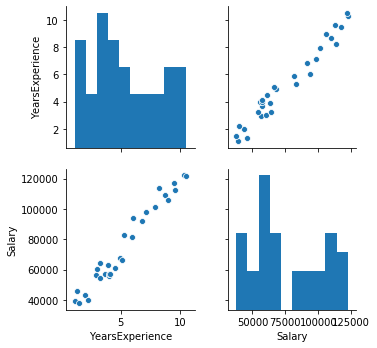

In [8]:
sns.pairplot(data)
plt.show()

### Building the model

In [9]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [10]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

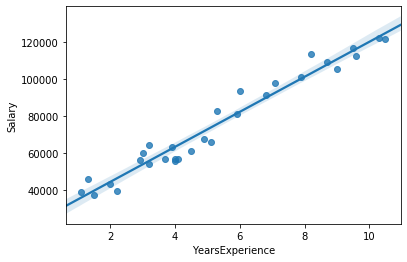

In [11]:
sns.regplot(data.YearsExperience,data.Salary)
plt.show()

In [12]:
model.rsquared

0.9569566641435086

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        23:09:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
predict1=model.predict()
predict1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [15]:
newdata=pd.DataFrame({'YearsExperience':2},index=[1]) #New data to predict

In [16]:
model.predict(newdata)

1    44692.124842
dtype: float64